Total number of images: 1641


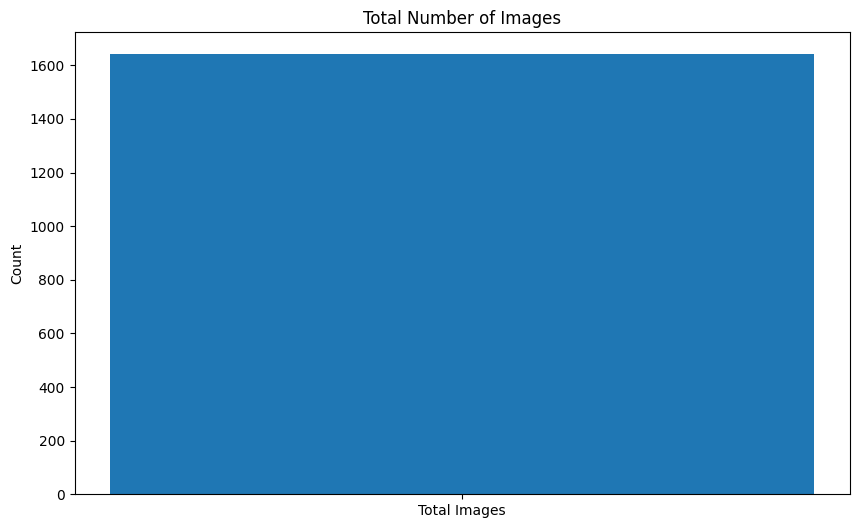

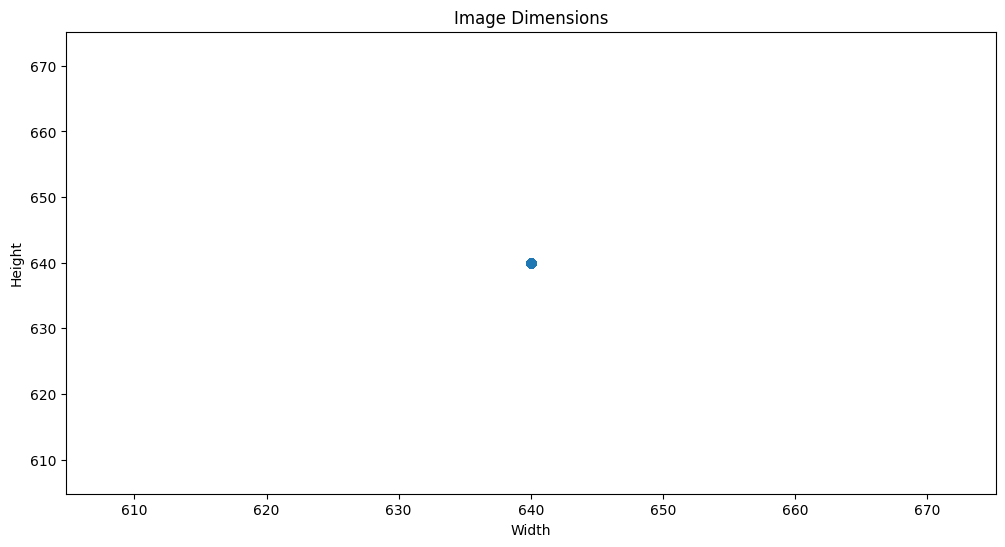

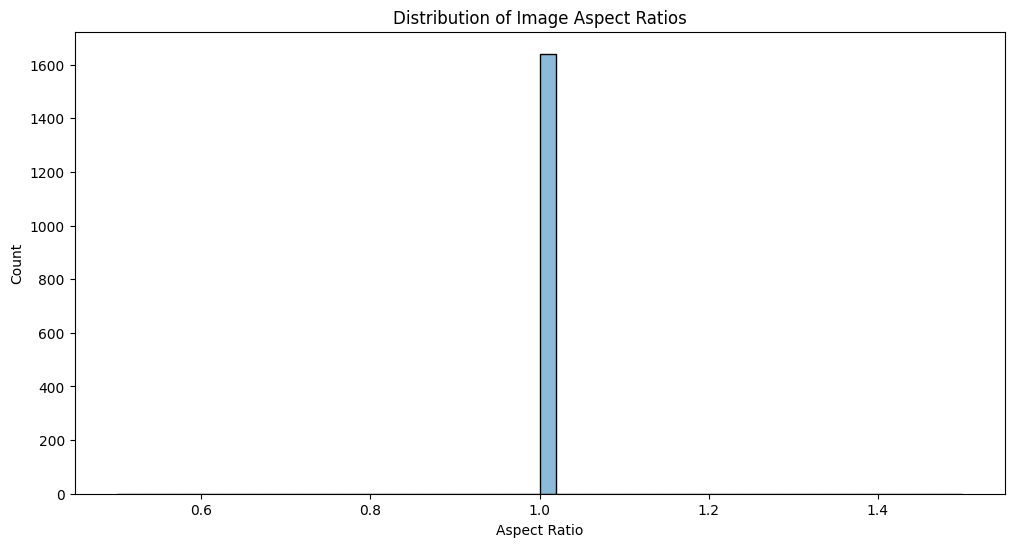

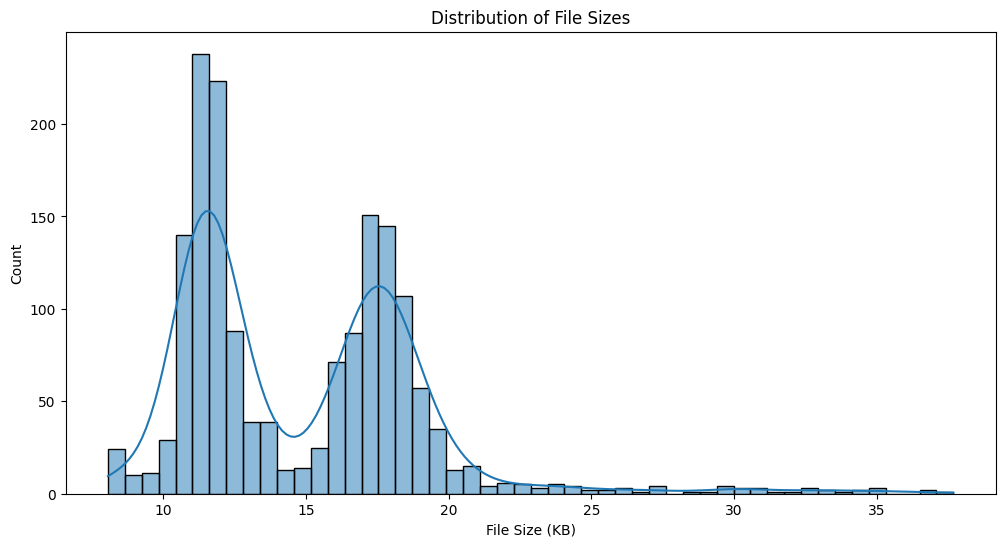

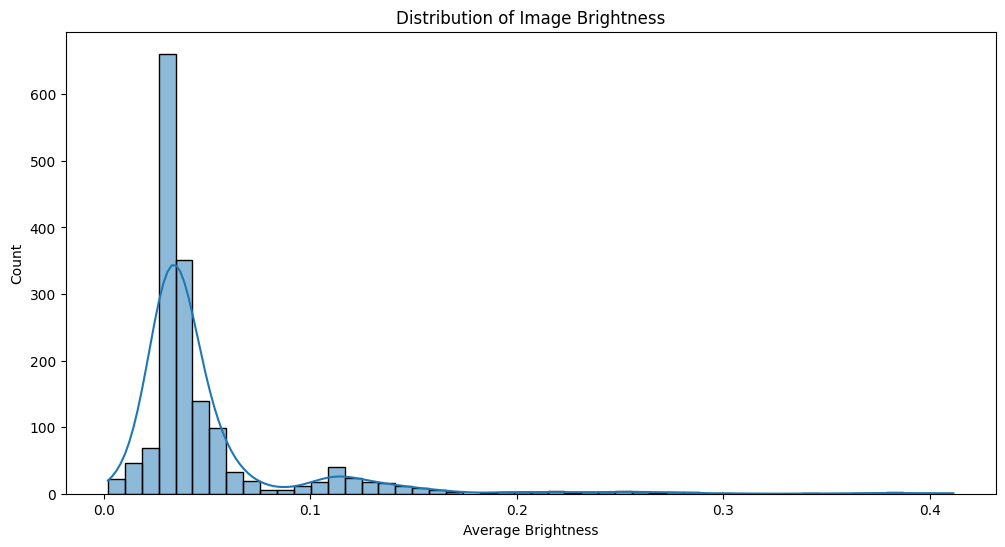

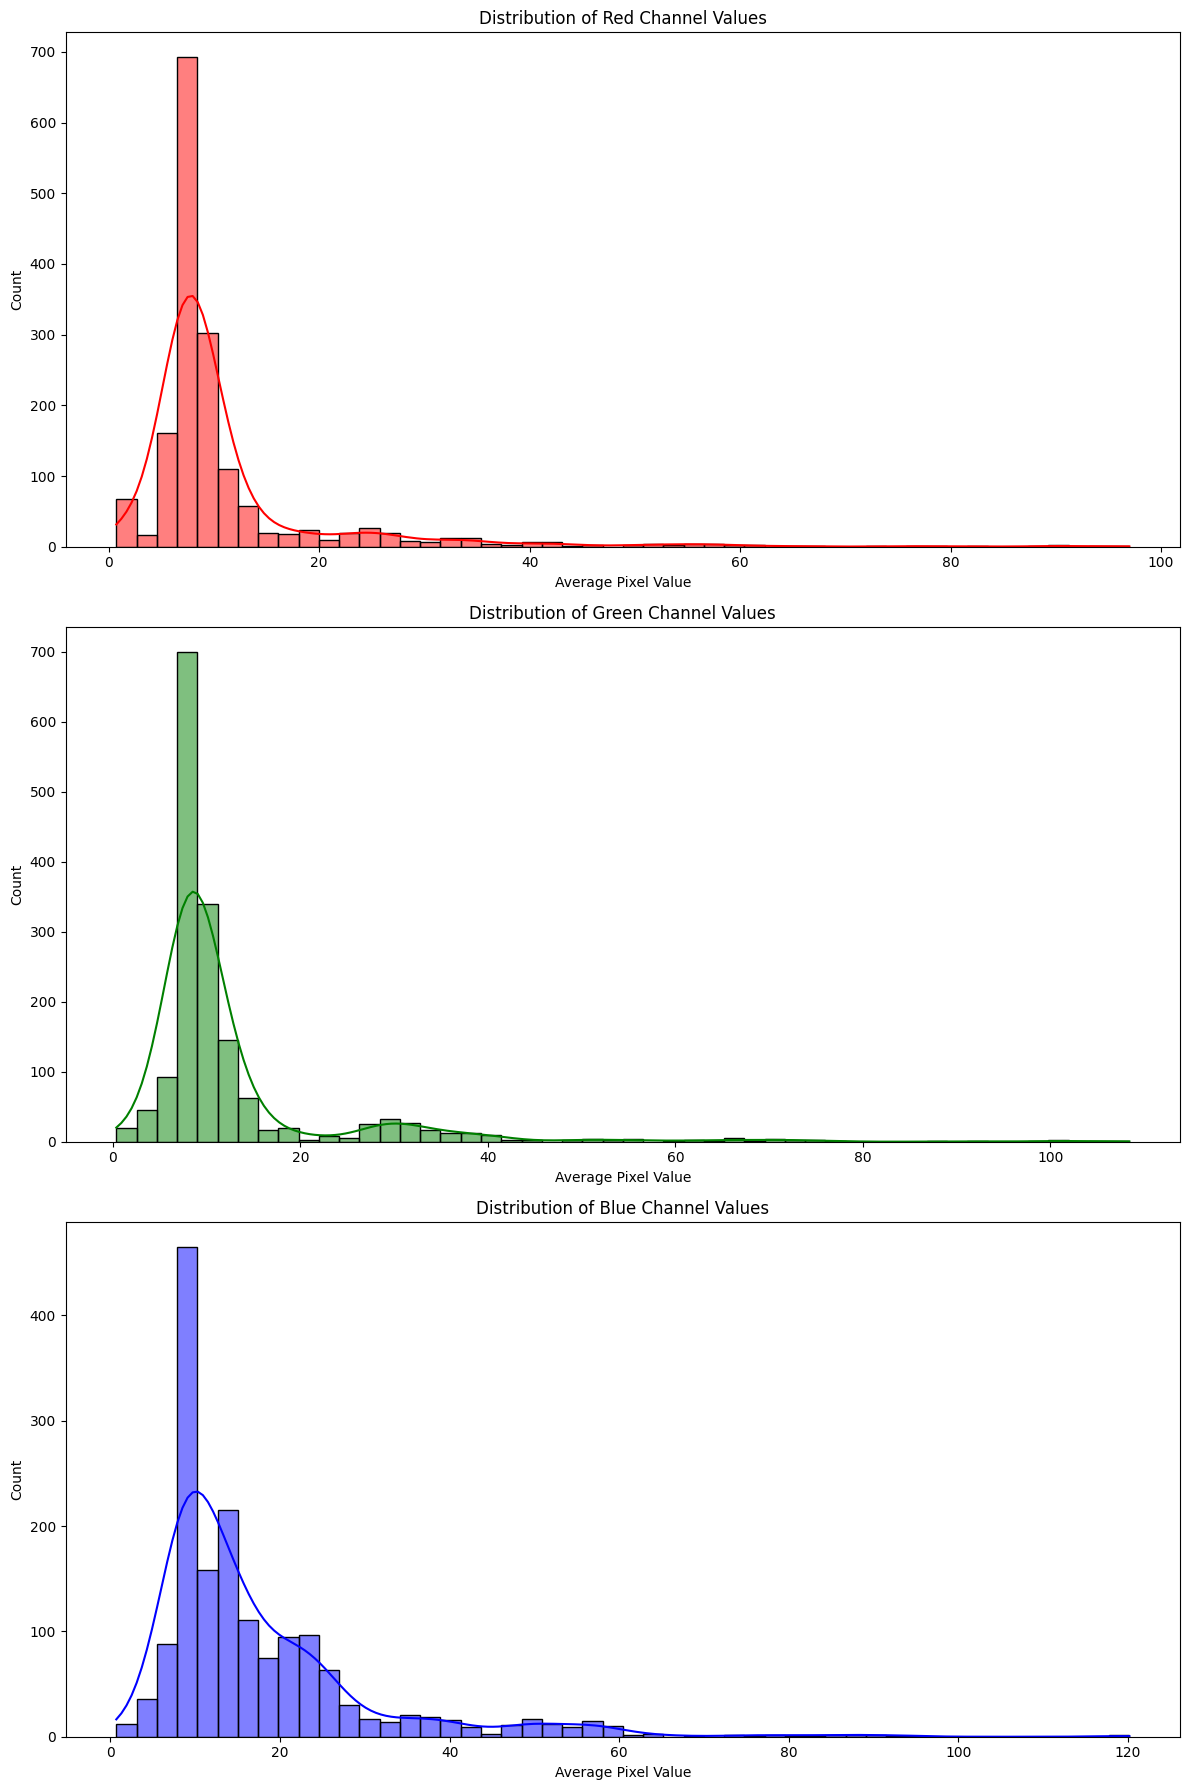

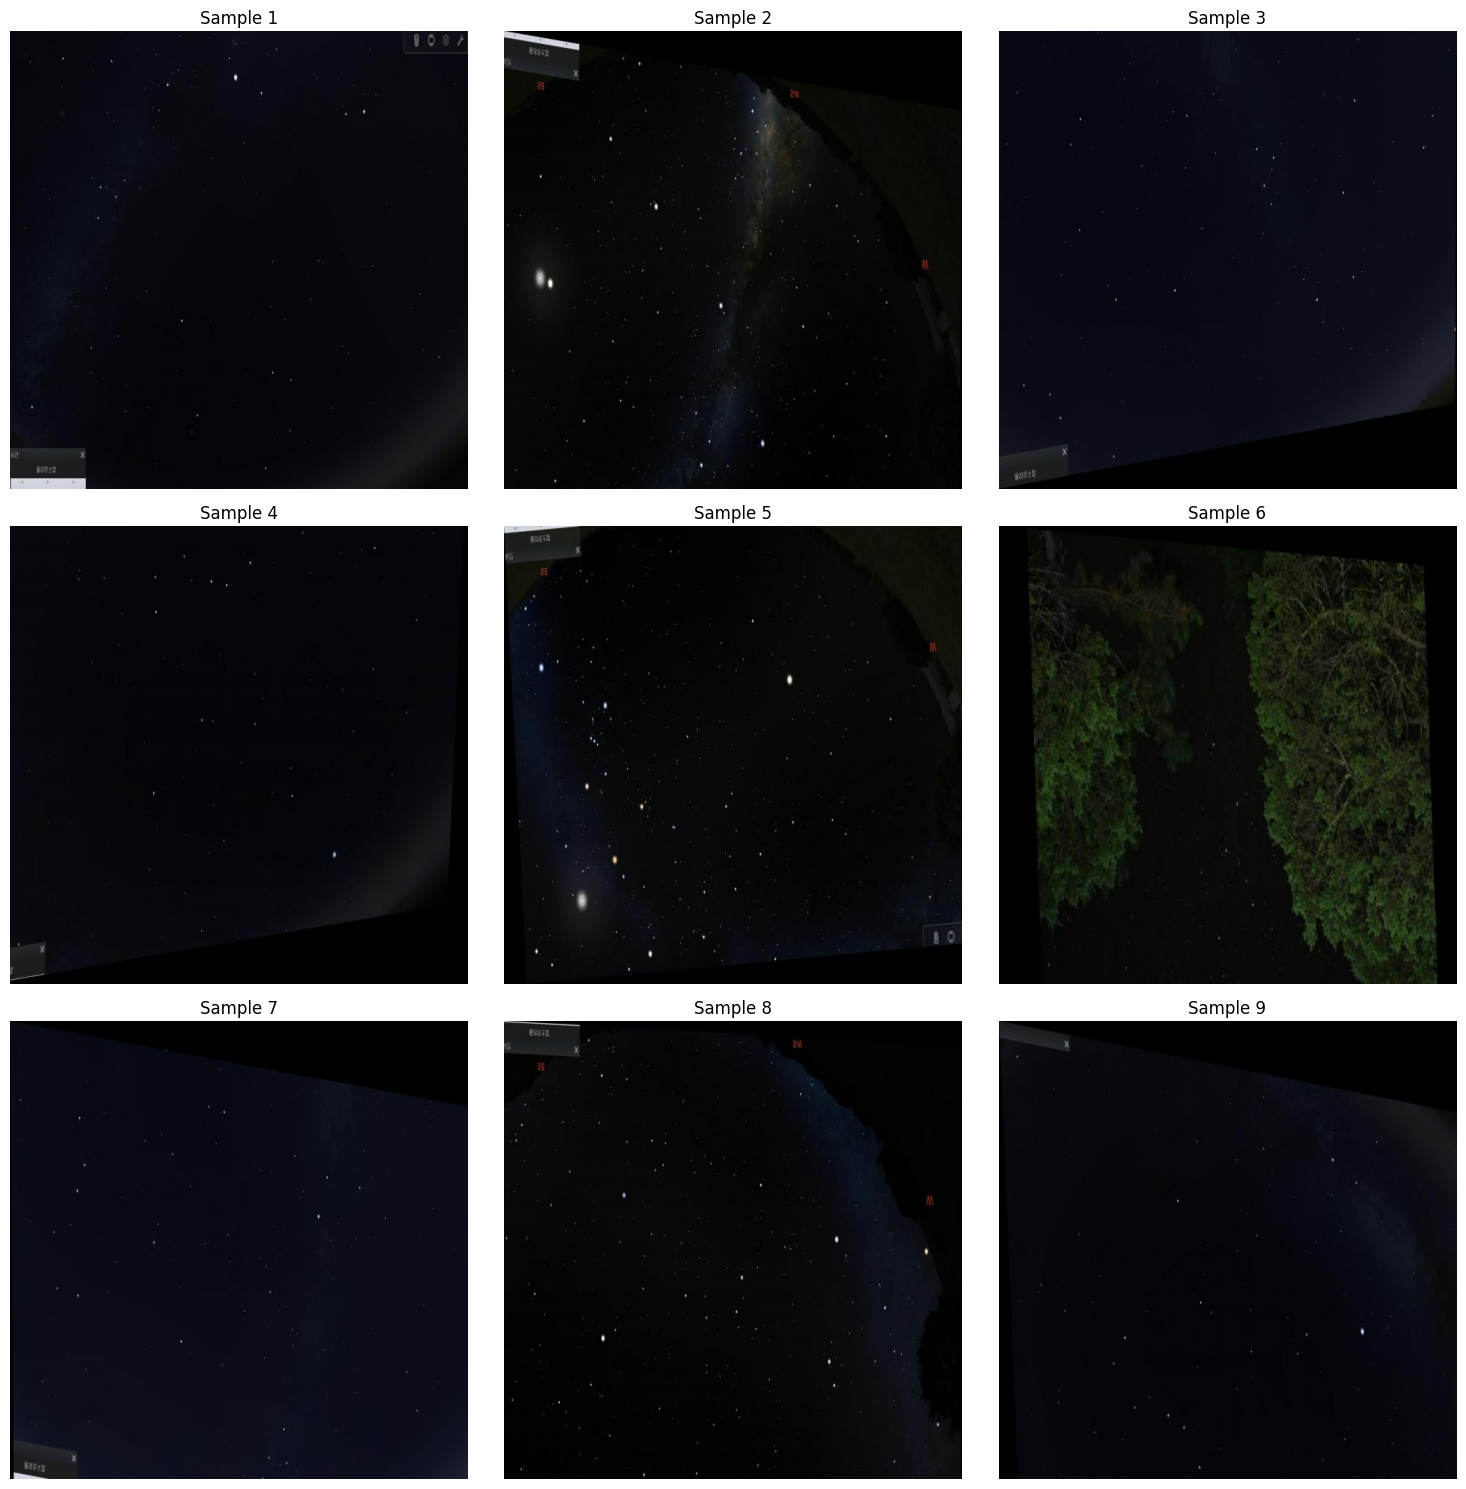

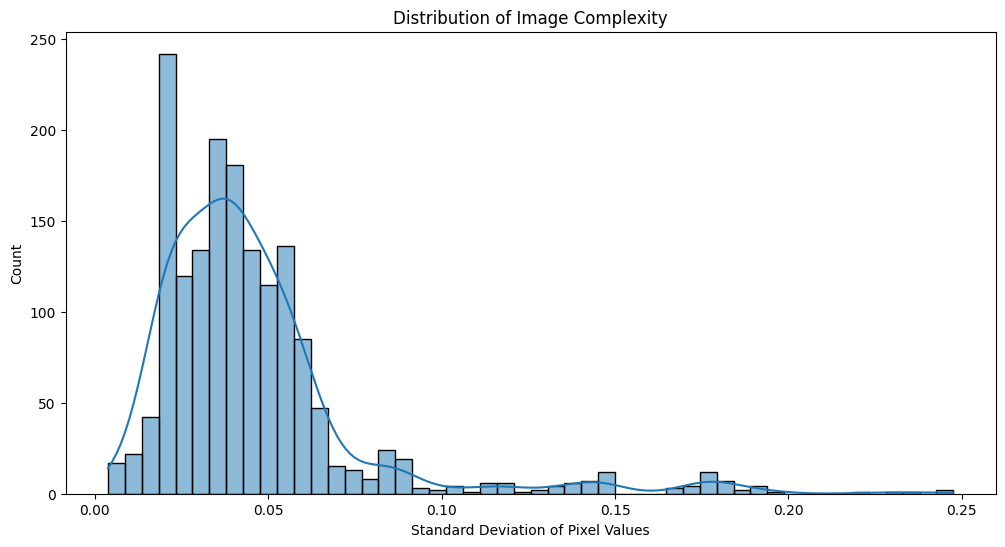

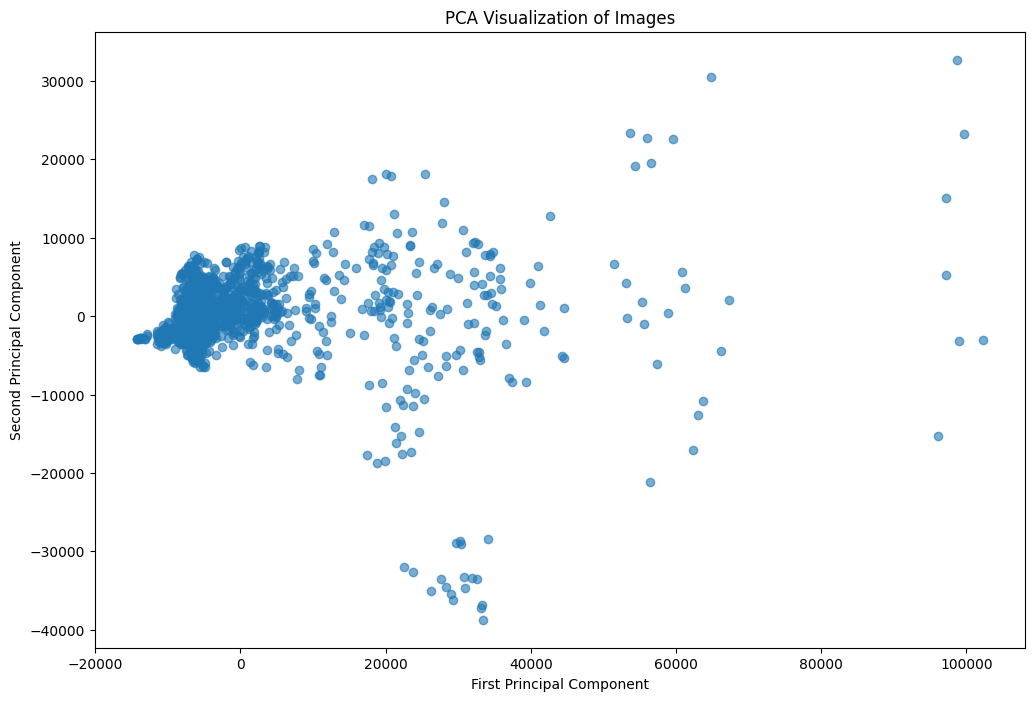

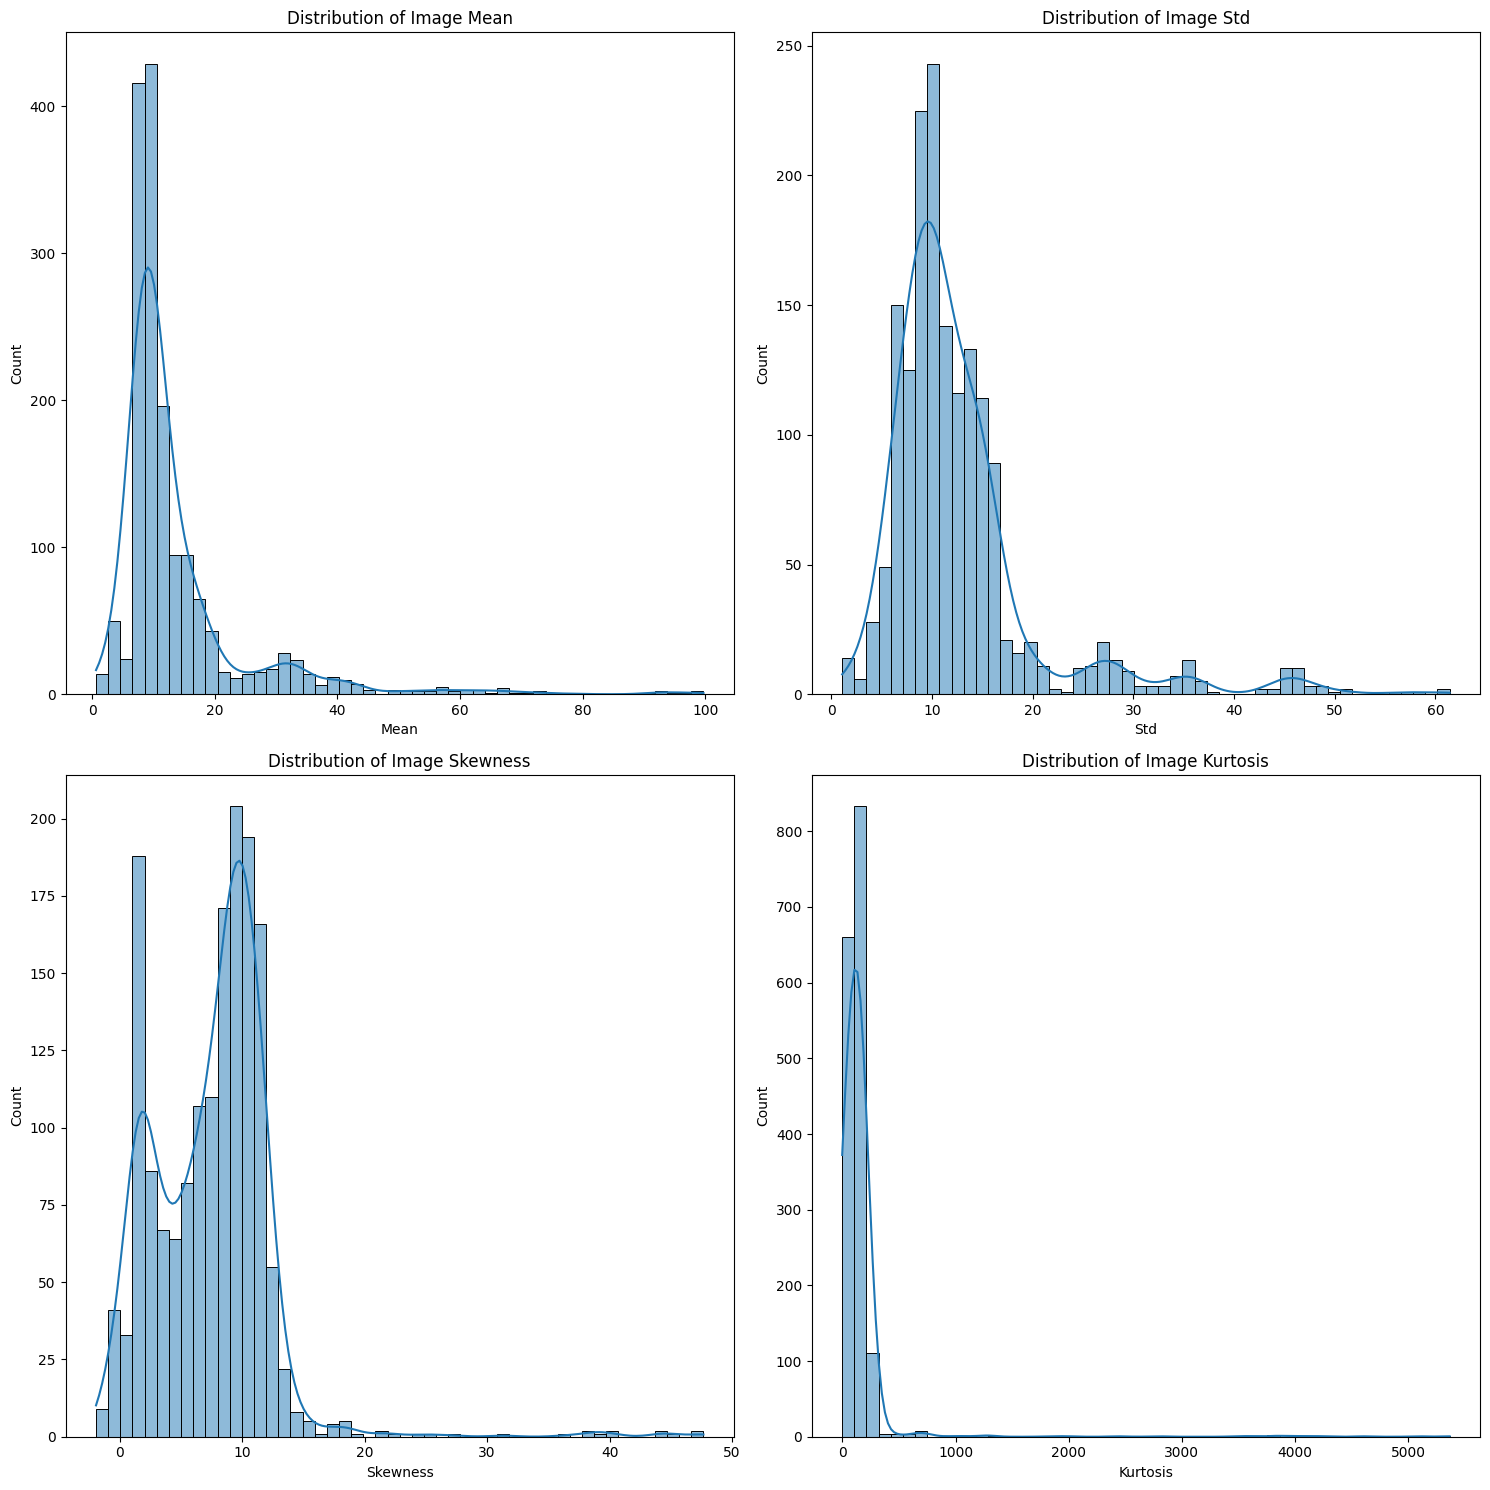

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import io, color, exposure
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

def load_image_data(data_dir):
    data = []
    for image_file in os.listdir(data_dir):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(data_dir, image_file)
            try:
                img = Image.open(image_path)
                img = img.convert('RGB')
                img_array = np.array(img)
                data.append({
                    'file_name': image_file,
                    'image': img_array,
                    'width': img.width,
                    'height': img.height,
                    'aspect_ratio': img.width / img.height,
                    'size': os.path.getsize(image_path)
                })
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    return pd.DataFrame(data)

def plot_image_count(df):
    plt.figure(figsize=(10, 6))
    plt.bar(['Total Images'], [len(df)])
    plt.title('Total Number of Images')
    plt.ylabel('Count')
    plt.show()

def plot_image_sizes(df):
    plt.figure(figsize=(12, 6))
    plt.scatter(df['width'], df['height'], alpha=0.5)
    plt.title('Image Dimensions')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

def plot_aspect_ratio_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['aspect_ratio'], bins=50, kde=True)
    plt.title('Distribution of Image Aspect Ratios')
    plt.xlabel('Aspect Ratio')
    plt.show()

def plot_file_size_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['size'] / 1024, bins=50, kde=True)  # Convert to KB
    plt.title('Distribution of File Sizes')
    plt.xlabel('File Size (KB)')
    plt.show()

def plot_brightness_distribution(df):
    brightnesses = df['image'].apply(lambda x: np.mean(color.rgb2gray(x)))
    plt.figure(figsize=(12, 6))
    sns.histplot(brightnesses, bins=50, kde=True)
    plt.title('Distribution of Image Brightness')
    plt.xlabel('Average Brightness')
    plt.show()

def plot_color_histograms(df):
    fig, axes = plt.subplots(3, 1, figsize=(12, 18))
    colors = ['red', 'green', 'blue']
    for i, color_name in enumerate(colors):
        color_values = df['image'].apply(lambda x: np.mean(x[:,:,i]))
        sns.histplot(color_values, bins=50, kde=True, ax=axes[i], color=color_name)
        axes[i].set_title(f'Distribution of {color_name.capitalize()} Channel Values')
        axes[i].set_xlabel('Average Pixel Value')
    plt.tight_layout()
    plt.show()

def plot_sample_images(df):
    sample_size = min(9, len(df))
    sample_images = df.sample(sample_size)
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()
    for i, (_, row) in enumerate(sample_images.iterrows()):
        axes[i].imshow(row['image'])
        axes[i].set_title(f"Sample {i+1}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

def plot_image_complexity(df):
    complexities = df['image'].apply(lambda x: np.std(color.rgb2gray(x)))
    plt.figure(figsize=(12, 6))
    sns.histplot(complexities, bins=50, kde=True)
    plt.title('Distribution of Image Complexity')
    plt.xlabel('Standard Deviation of Pixel Values')
    plt.show()

def plot_pca_visualization(df):
    flattened_images = np.array([img.flatten() for img in df['image']])
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(flattened_images)
    plt.figure(figsize=(12, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
    plt.title('PCA Visualization of Images')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

def plot_image_statistics(df):
    stats = df['image'].apply(lambda x: pd.Series({
        'mean': np.mean(x),
        'std': np.std(x),
        'skewness': skew(x.flatten()),
        'kurtosis': kurtosis(x.flatten())
    }))
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes = axes.ravel()
    for i, col in enumerate(['mean', 'std', 'skewness', 'kurtosis']):
        sns.histplot(stats[col], bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of Image {col.capitalize()}')
        axes[i].set_xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()

def main():
    data_dir = r"E:\\University\\CU_Classes\\Year-1\\Fall 2024\\CSCI_5502_Data Mining\\Milestone_project\\stellar_mapping\\data\\constellation_dataset_1\\train"
    df = load_image_data(data_dir)
    
    print(f"Total number of images: {len(df)}")
    
    plot_image_count(df)
    plot_image_sizes(df)
    plot_aspect_ratio_distribution(df)
    plot_file_size_distribution(df)
    plot_brightness_distribution(df)
    plot_color_histograms(df)
    plot_sample_images(df)
    plot_image_complexity(df)
    plot_pca_visualization(df)
    plot_image_statistics(df)

if __name__ == "__main__":
    main()

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torchvision.transforms as transforms
import torch


In [2]:
# Load the class labels
csv_file_path = r"E:\University\CU_Classes\Year-1\Fall 2024\CSCI_5502_Data Mining\Milestone_project\stellar_mapping\data\constellation_dataset_1\train\_classes.csv"
class_labels_df = pd.read_csv(csv_file_path)

print(class_labels_df.head())

                                            filename   aquila   bootes  \
0  2022-01-31-00-00-00-s_png_jpg.rf.378e5a31ac6b8...        0        0   
1  2022-03-24-00-00-00-s_png_jpg.rf.379717e7cb15b...        0        1   
2  2022-06-24-00-00-00-n_png_jpg.rf.37c489beb12c6...        0        0   
3  2022-01-22-00-00-00-s_png_jpg.rf.37e31378be869...        0        0   
4  orion_constellation_003_png_jpg.rf.380839e90b9...        0        0   

    canis_major   canis_minor   cassiopeia   cygnus   gemini   leo   lyra  \
0             1             1            0        0        1     1      0   
1             0             1            0        0        1     1      0   
2             0             0            1        1        0     0      0   
3             1             1            0        0        1     1      0   
4             0             0            0        0        0     0      0   

    moon   orion   pleiades   sagittarius   scorpius   taurus   ursa_major  
0      0       

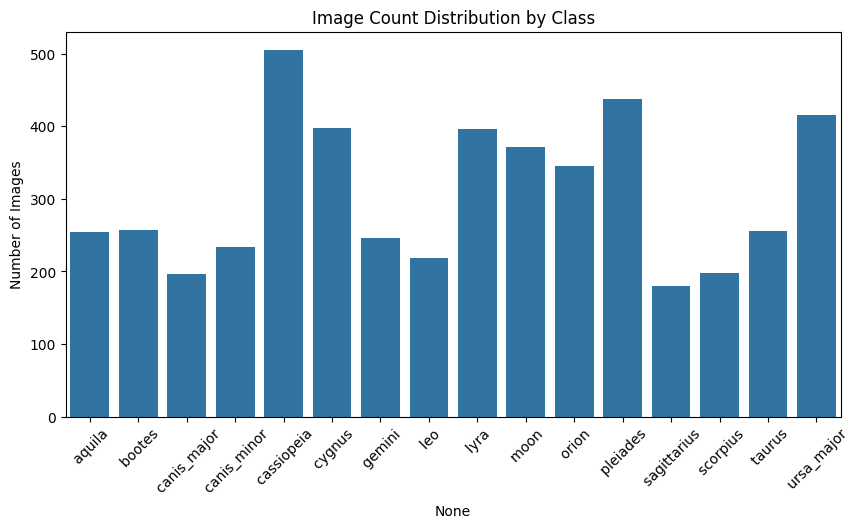

In [3]:
# Count the number of images for each class
class_counts = class_labels_df.iloc[:, 1:].sum()  # Sum across rows for each class

plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Image Count Distribution by Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


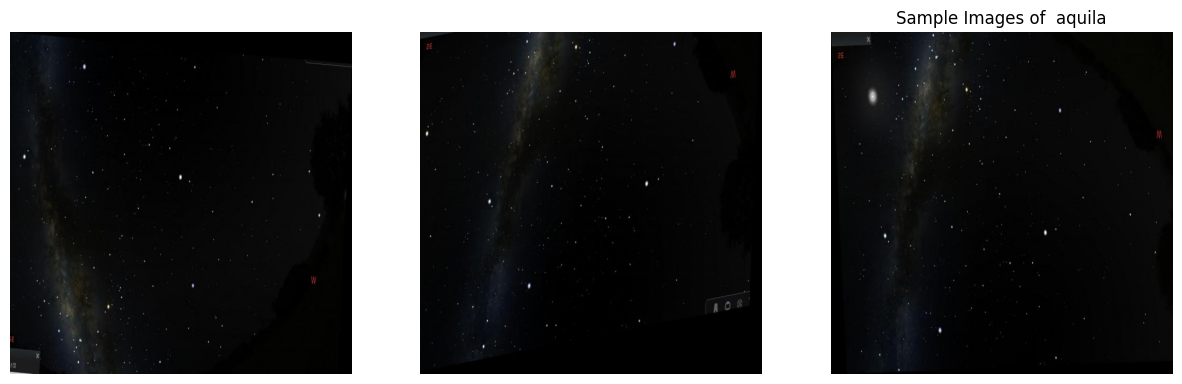

In [4]:
def plot_sample_images(class_labels_df, class_name, n=5):
    sample_images = class_labels_df[class_labels_df[class_name] == 1].sample(n=n)
    plt.figure(figsize=(15, 5))
    for i, row in enumerate(sample_images.iterrows()):
        img_path = os.path.join(r'E:\University\CU_Classes\Year-1\Fall 2024\CSCI_5502_Data Mining\Milestone_project\stellar_mapping\data\constellation_dataset_1\train', row[1]['filename'])
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.title(f'Sample Images of {class_name}')
    plt.show()

# Example for the 'aquila' class
plot_sample_images(class_labels_df, class_labels_df.columns[1], n=3)


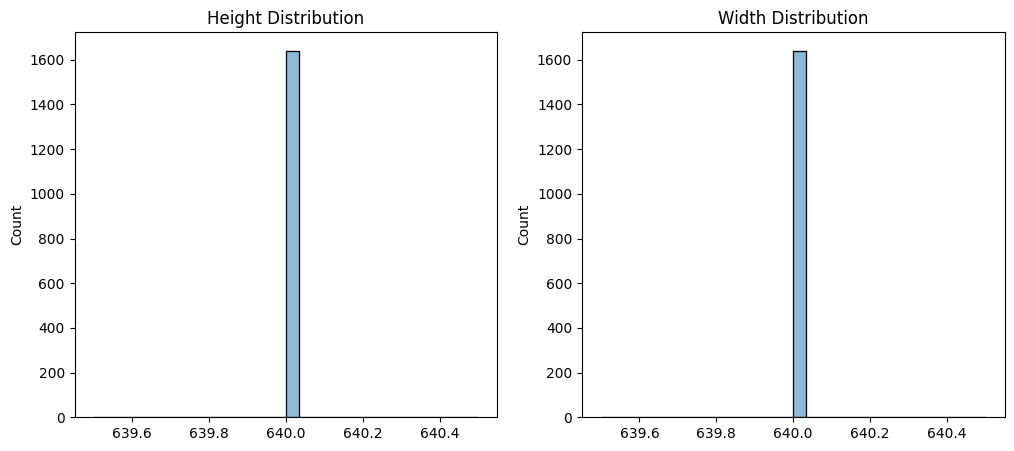

In [5]:
image_sizes = []
image_folder = r'E:\University\CU_Classes\Year-1\Fall 2024\CSCI_5502_Data Mining\Milestone_project\stellar_mapping\data\constellation_dataset_1\train'
for filename in class_labels_df['filename']:
    img_path = os.path.join(image_folder, filename)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

heights, widths = zip(*image_sizes)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(heights, bins=30, kde=True)
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(widths, bins=30, kde=True)
plt.title('Width Distribution')
plt.show()


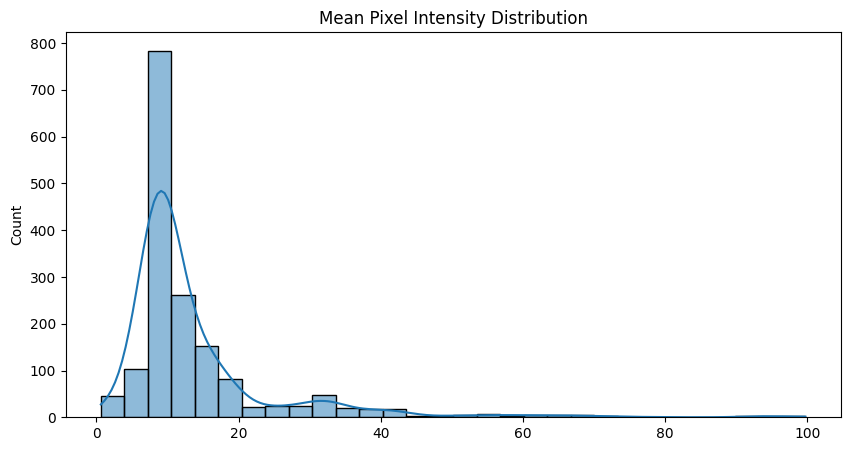

In [6]:
mean_intensities = []
for filename in class_labels_df['filename']:
    img_path = os.path.join(image_folder, filename)
    with Image.open(img_path) as img:
        mean_intensities.append(np.array(img).mean())

plt.figure(figsize=(10, 5))
sns.histplot(mean_intensities, bins=30, kde=True)
plt.title('Mean Pixel Intensity Distribution')
plt.show()


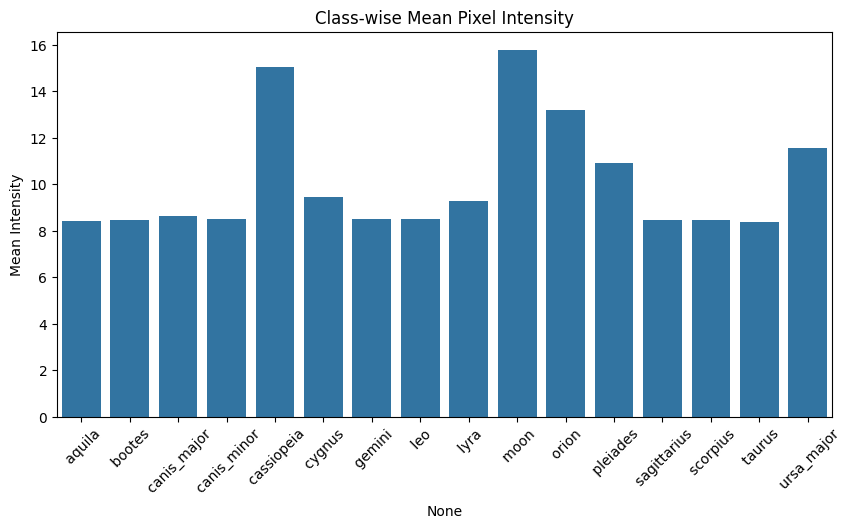

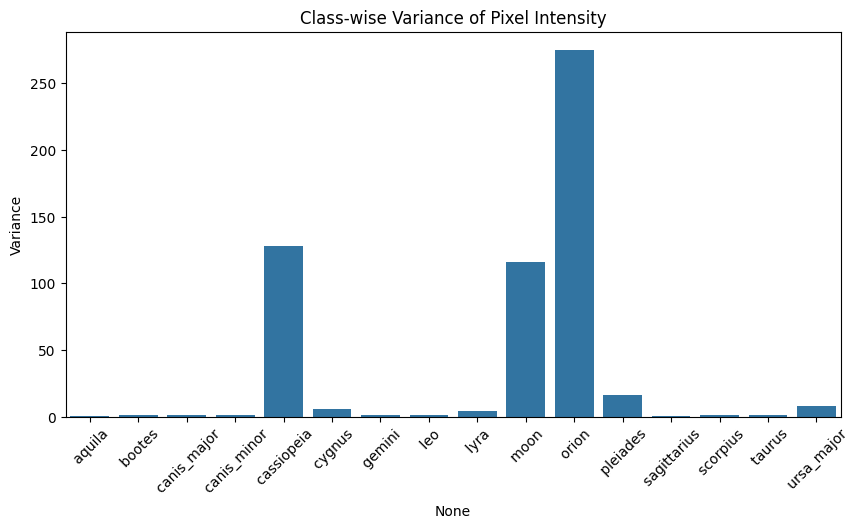

In [10]:
class_means = []
class_variances = []
class_names = class_counts.index

for class_name in class_names:
    class_data = []
    for filename, row in class_labels_df.iterrows():
        if row[class_name] == 1:
            img_path = os.path.join(image_folder, row["filename"])
            with Image.open(img_path) as img:
                class_data.append(np.array(img).mean())
    
    class_means.append(np.mean(class_data))
    class_variances.append(np.var(class_data))

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_means)
plt.title('Class-wise Mean Pixel Intensity')
plt.ylabel('Mean Intensity')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_variances)
plt.title('Class-wise Variance of Pixel Intensity')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()
